## About

This page showcases the work of [Cara R Thompson](https://www.cararthompson.com/), 
built for the [TidyTuesday](https://github.com/rfordatascience/tidytuesday) 
initiative. You can find the original code on her GitHub repository 
[here](https://github.com/cararthompson/tidytuesdays/blob/master/scripts/202007b_astronauts.R), written in [R](https://www.r-graph-gallery.com).

Thanks to her for accepting sharing her work here! Thanks also to [Tomás Capretto](https://tcapretto.netlify.app) who translated this work from R to Python! 🙏🙏

As a teaser, here is the plot we’re gonna try building:

![scatterplot](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-scatterplot-astronaut.png?raw=true)

## Load libraries

Today's visualization uses the [`flexitext`](https://tomicapretto.github.io/flexitext/) library. This library is going to make our life easier when combining different font styles in the same piece of text. In addition, this chart also requires `FancyArrowPatch` to draw arrows.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from flexitext import flexitext
from matplotlib.patches import FancyArrowPatch

>Note: the `flexitext` library can be installed with `pip install flexitext`

The following sets some default values, such as the font, its weight, and colors. For a step-by-step guide on how to install and load custom fonts in Matplotlib, have a look at [this post](https://python-graph-gallery.com/custom-fonts-in-matplotlib).

In [2]:
plt.rcParams.update({"font.family": "Corbel", "font.weight": "light"})
plt.rcParams["text.color"] = "white"
plt.rcParams["axes.labelcolor"] = "white"
plt.rcParams["xtick.labelcolor"] = "white"
plt.rcParams["ytick.labelcolor"] = "white"

## Load and prepare the data

Today's chart visualizes the relationship between astronauts' age at start of a mission, mission length, and age the astronaut first went to space. The data originally comes from [Mariya Stavnichuk and Tatsuya Corlett](https://data.mendeley.com/datasets/86tsnnbv2w/1), but this post is based on the version released for the [TidyTuesday](https://github.com/rfordatascience/tidytuesday) initiative on the week of 2020-07-14. You can find the original announcement and more information about the data [here](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-07-14/readme.md). Thank you all for making this possible! 🙏🙏

In [3]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-14/astronauts.csv"
data = pd.read_csv(url)
data.head() 

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,...,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0
3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,...,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,...,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0


The comes almost ready for the chart. The only extra step is to compute the astronauts' age at mission. This approximated by subtracting the year of mission from the year of birth.

In [4]:
data["age_at_mission"] = data["year_of_mission"] - data["year_of_birth"]

## Getting things ready

Before going straight to create the chart, it's better to define all the values that are going to be used. Today's chart visualizes the following variables

* Year of mission (**vertical axis**)
* Astronauts' age at mission (**horizontal axis**)
* Astronaut's sex (**color**)
* The number of hours the mission took (**dot size**)
* Number of times the astronauts went to space (**dot opacity**)

which are defined next:

In [5]:
year_of_mission = data["year_of_mission"].values
age_at_mission = data["age_at_mission"].values
sex = data["sex"].values
hours_mission = data["hours_mission"].values
total_number_of_missions = data["total_number_of_missions"].values

Then, the colors

In [6]:
DARKBLUE = "#1d1330"
ORANGE = "#ffa72b"
LIGHTBLUE = "#e1f7fa"

And finally, one function that is going to scale numbers to an arbitrary interval, which is used to scale the dot size and transparency.

In [7]:
def scale(x, lower=0, upper=1):
    return ((x - np.min(x)) / (np.max(x) - np.min(x))) * (upper - lower)  + lower

alpha = scale(total_number_of_missions, 0.1, 1)
sizes = scale(hours_mission, 10, 200)

# Also create an array with the colors
colors = np.where(sex == "male", LIGHTBLUE, ORANGE)

## Basic scatterplot

The very first step is to draw the scatterplot. Matplotlib provides the `.scatter()` method which given coordinates for the horizontal and vertical axes, draws a scatterplot.

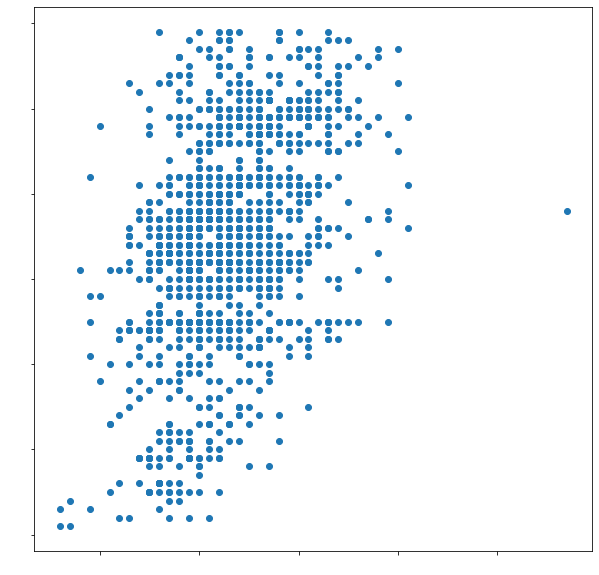

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(age_at_mission, year_of_mission);

But this is too far away from the original figure we're trying to replicate today.

However, it is not difficult to improve the chart dramatically. We just need to use the colors, sizes, and opacities created above.

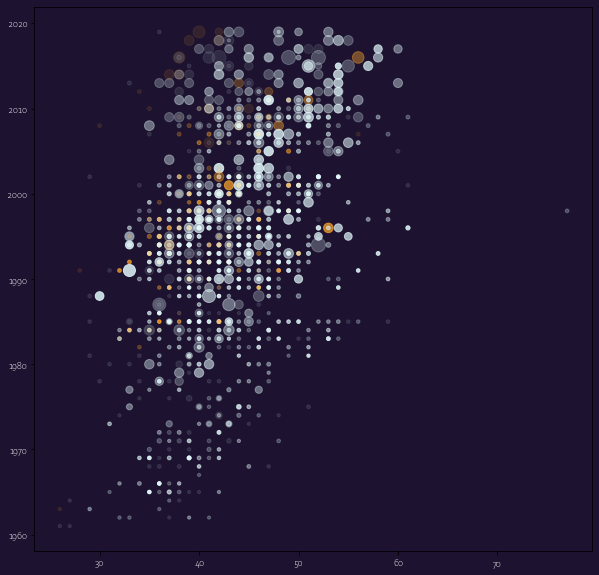

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))

# Set background color
fig.set_facecolor(DARKBLUE)
ax.set_facecolor(DARKBLUE)

ax.scatter(age_at_mission, year_of_mission, c=colors, s=sizes, alpha=alpha);

That's a massive improvement! The scatterplot not only looks much better, but it is also more insightful because it contains much more information now.

## Customize layout

The following step is about modifying the layout. The chart obtained so far contains the default Matplotlib frame, which should not be included in the final figure. This is a good time to customize tick labels.

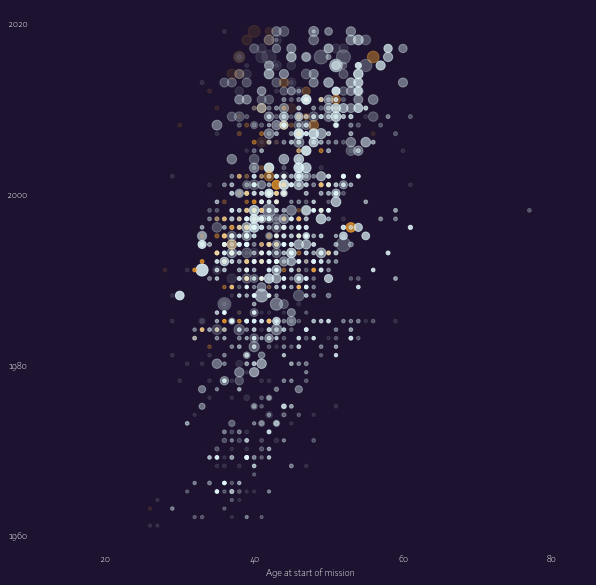

In [10]:
# Remove frame (or all the spines at the same time)
ax.set_frame_on(False)

# Customize limits, tick positions, and tick labels for the horizontal axis
ax.set_xlim(10, 85)
ax.set_xticks([20, 40, 60, 80])
ax.set_xticklabels([20, 40, 60, 80], fontsize=10)

# Set a label for the horizontal axis
ax.set_xlabel("Age at start of mission", size=10, weight="light")


# Customize tick positions and tick labels for the vertical axis
ax.set_yticks([1960, 1980, 2000, 2020])
ax.set_yticklabels([1960, 1980, 2000, 2020], fontsize=10)

# Remove tick marks from both axes
ax.tick_params(length=0)

fig

## Add title and subtitle

Very well-thought annotations are one of the aspects that shine in this chart. The first step here is to make some room for the title and the subtitle. Then, we add the title using the **AR DESTINE** font. And finally, we add the subtitle using the `flexitext()` function. This function allows us to mix normal and light font weights as well as colors without having to worry about proper alignments or any other problems that would arise if we were placing different pieces of text by hand.

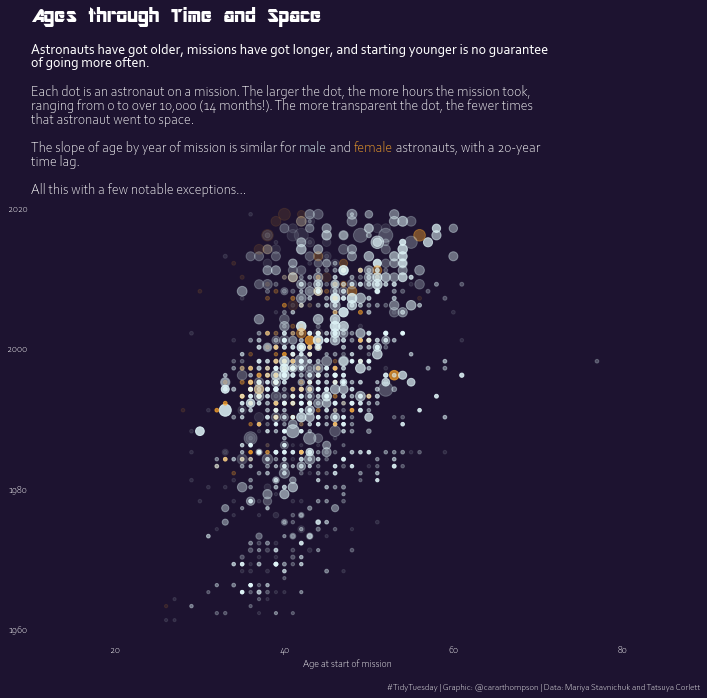

In [11]:
# Adjust figure padding. 
fig.subplots_adjust(top=0.7, bottom=0.08, left=0.06, right=0.94)

# Add title
fig.text(
    0.06, 0.94, "Ages through Time and Space", 
   fontsize=20, fontname="AR DESTINE", va="baseline"
)

# Add subtitle
subtitle = """<size:14><weight:normal>Astronauts have got older, missions have got longer, and starting younger is no guarantee  
of going more often.</> 
  
Each dot is an astronaut on a mission. The larger the dot, the more hours the mission took,  
ranging from 0 to over 10,000 (14 months!). The more transparent the dot, the fewer times  
that astronaut went to space.  

The slope of age by year of mission is similar for <color:#e1f7fa>male</> and <color:#ffa72b>female</> astronauts, with a 20-year  
time lag.  

All this with a few notable exceptions...</>
"""  
flexitext(0.06, 0.91, subtitle, va="top", xycoords="figure fraction", ax=ax)

# Add caption to give appropriate credits to the original author
caption = "#TidyTuesday | Graphic: @cararthompson | Data: Mariya Stavnichuk and Tatsuya Corlett"
fig.text(0.99, 0.01, caption, ha="right", va="bottom", size=9)

fig

## Add annotations

The chart is very close to being publication-ready. But there's still room for improvement. We can take advantage of the space around the scatter to include some annotations that are going to make the story being told much richer.

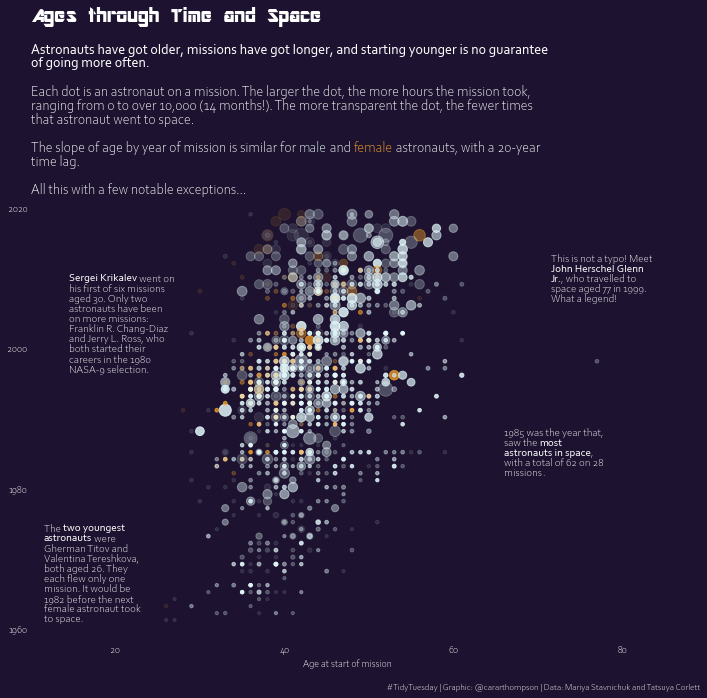

In [12]:
text = """<weight:light, size:11>This is not a typo! Meet
<weight:normal>John Herschel Glenn\nJr.</>, who travelled to
space aged 77 in 1999. \nWhat a legend!</>
"""
flexitext(0.9, 0.8, text, ha="center", va="center", ax=ax)


text = """<weight:light, size:11>1985 was the year that,
saw the <weight:normal>most
astronauts in space</>,
with a total of 62 on 28
missions</>.
"""
flexitext(0.825, 0.41, text, ha="center", va="center", ax=ax)

text = """<weight:light, size:11>
The <weight:normal>two youngest
astronauts</> were 
Gherman Titov and
Valentina Tereshkova, 
both aged 26. They
each flew only one
mission. It would be
1982 before the next
female astronaut took
to space.
</>
"""
flexitext(0.02, 0.14, text, va="center", ax=ax)


text = """<weight:light, size:11><weight:normal>Sergei Krikalev</> went on
his first of six missions
aged 30. Only two
astronauts have been
on more missions: 
Franklin R. Chang-Diaz
and Jerry L. Ross, who
both started their
careers in the 1980
NASA-9 selection.</>
""" 
flexitext(0.06, 0.7, text, ax=ax)

fig

## Add arrows

And the last step is to connect the stories being told with the point in they represent. For this task we are going to use `FancyArrowPatch`es. These patches allow us to draw both straight and curved arrows while customizing other aspects such as the color or the width.

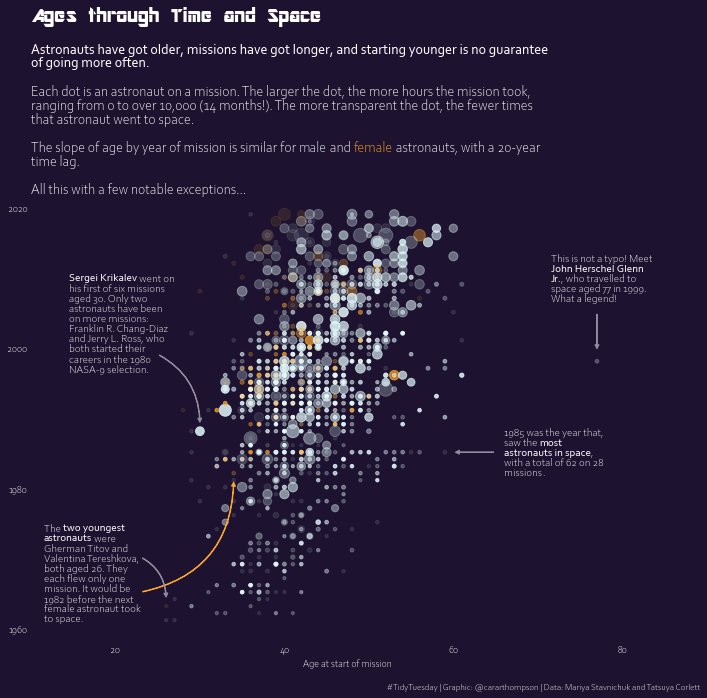

In [13]:
# This define the style of the arrow. 
# Play with these values to see how they affect the result.
style = "Simple, tail_width=0.5, head_width=4, head_length=4"

# Straight arrow
arrow = FancyArrowPatch(
    (77, 2005), (77, 1999.5),
    color = "#938ca1",
    arrowstyle = style
)
ax.add_patch(arrow)

# Straight arrow
arrow = FancyArrowPatch(
    (65, 1985), (60, 1985),
    color = "#938ca1",
    arrowstyle = style
)
ax.add_patch(arrow)

# Curved arrow:
# Note the 'connectionstyle' argument.
# The 'rad' value determines the curvature.
arrow = FancyArrowPatch(
    (23, 1965), (34, 1981),
    color = "#ffa72b",
    arrowstyle = style,
    connectionstyle="arc3, rad=0.4",
)
ax.add_patch(arrow)

# Note the negative 'rad' and how it 
# changes the direction of the curvature
arrow = FancyArrowPatch(
    (23, 1970), (26, 1964),
    color = "#938ca1",
    arrowstyle = style,
    connectionstyle="arc3, rad=-0.3",
)
ax.add_patch(arrow)


arrow = FancyArrowPatch(
    (25, 1999), (30, 1989),
    color = "#938ca1",
    arrowstyle = style,
    connectionstyle="arc3, rad=-0.3",
)
ax.add_patch(arrow)

fig

# fig.savefig("plot.png", dpi=400) to save a high quality figure

Yay!! We've done it! What a beautiful chart 😍